# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | al khawr
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | arquitecto tomas romero pereira
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | susuman
Processing Record 17 of Set 1 | weno
Processing Record 18 of Set 1 | dalandzadgad
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 |

Processing Record 37 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 38 of Set 4 | lihue
Processing Record 39 of Set 4 | minas de marcona
Processing Record 40 of Set 4 | giado
Processing Record 41 of Set 4 | crane
Processing Record 42 of Set 4 | kapa'a
Processing Record 43 of Set 4 | petropavlovsk-kamchatsky
Processing Record 44 of Set 4 | wyndham
Processing Record 45 of Set 4 | tete
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | pacasmayo
Processing Record 48 of Set 4 | kristiansund
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | levuka
Processing Record 1 of Set 5 | nguigmi
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | perry
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | ciudad melchor muzquiz
Processing Record 6 of Set 5 | menongue
Processing Record 7 of Set 5 | muang phon-hong
Processing Record 8 of Set 5 | college
Processing Record 9 of Set 5 | tommot
Processing Re

City not found. Skipping...
Processing Record 28 of Set 8 | keflavik
Processing Record 29 of Set 8 | al kawa
Processing Record 30 of Set 8 | rundu
Processing Record 31 of Set 8 | howrah
Processing Record 32 of Set 8 | zunyi
Processing Record 33 of Set 8 | sabang
Processing Record 34 of Set 8 | constantia
Processing Record 35 of Set 8 | freetown
Processing Record 36 of Set 8 | kattivakkam
Processing Record 37 of Set 8 | bassila
Processing Record 38 of Set 8 | yakeshi
Processing Record 39 of Set 8 | ocean shores
Processing Record 40 of Set 8 | dhidhdhoo
Processing Record 41 of Set 8 | mendoza
Processing Record 42 of Set 8 | hassi messaoud
Processing Record 43 of Set 8 | holualoa
Processing Record 44 of Set 8 | juneau
Processing Record 45 of Set 8 | taseyevo
Processing Record 46 of Set 8 | chui
Processing Record 47 of Set 8 | porto novo
Processing Record 48 of Set 8 | makow mazowiecki
Processing Record 49 of Set 8 | beltran
Processing Record 0 of Set 9 | remire-montjoly
Processing Record 

Processing Record 18 of Set 12 | hailey
Processing Record 19 of Set 12 | nyrob
Processing Record 20 of Set 12 | monteagudo
Processing Record 21 of Set 12 | tuy hoa
Processing Record 22 of Set 12 | mejit
Processing Record 23 of Set 12 | mil'kovo
Processing Record 24 of Set 12 | pacific grove
Processing Record 25 of Set 12 | muntok
Processing Record 26 of Set 12 | fort saskatchewan
Processing Record 27 of Set 12 | kimry
Processing Record 28 of Set 12 | niafunke
Processing Record 29 of Set 12 | xilitla
Processing Record 30 of Set 12 | phalaborwa
Processing Record 31 of Set 12 | san juan
Processing Record 32 of Set 12 | ulladulla
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kirakira,-10.4544,161.9205,26.08,87,66,3.14,SB,1698760752
1,ust-nera,64.5667,143.2000,-17.59,100,100,2.15,RU,1698760752
2,nemuro,43.3236,145.5750,11.74,89,43,5.61,JP,1698760752
3,hawaiian paradise park,19.5933,-154.9731,23.35,97,100,2.57,US,1698760752
4,al khawr,25.7667,51.3167,25.94,51,87,2.70,QA,1698760752


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,26.08,87,66,3.14,SB,1698760752
1,ust-nera,64.5667,143.2000,-17.59,100,100,2.15,RU,1698760752
2,nemuro,43.3236,145.5750,11.74,89,43,5.61,JP,1698760752
3,hawaiian paradise park,19.5933,-154.9731,23.35,97,100,2.57,US,1698760752
4,al khawr,25.7667,51.3167,25.94,51,87,2.70,QA,1698760752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

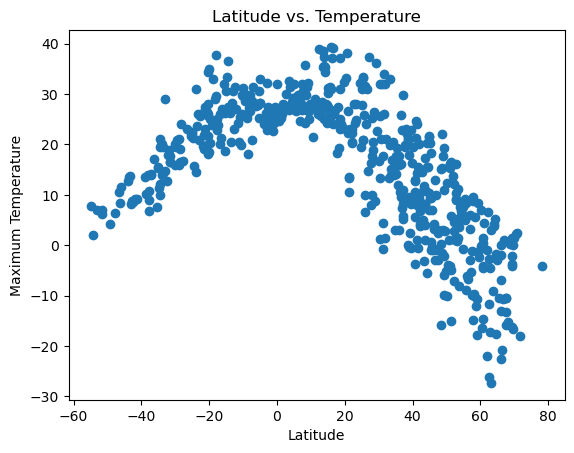

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

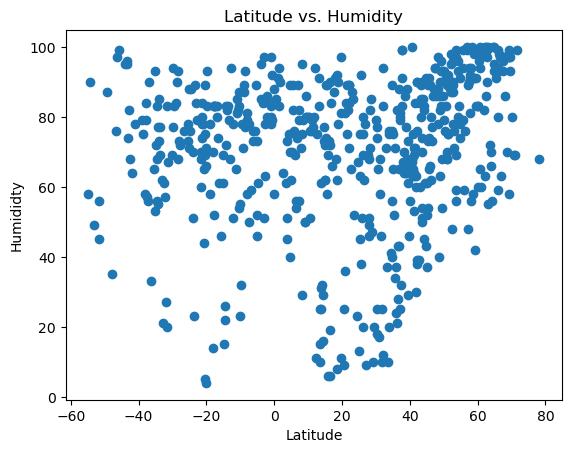

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humididty")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

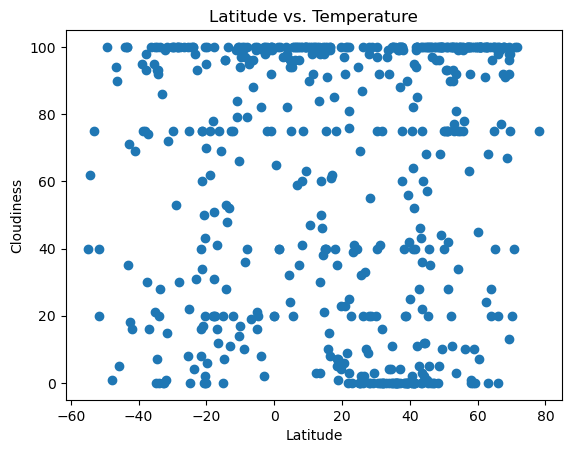

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

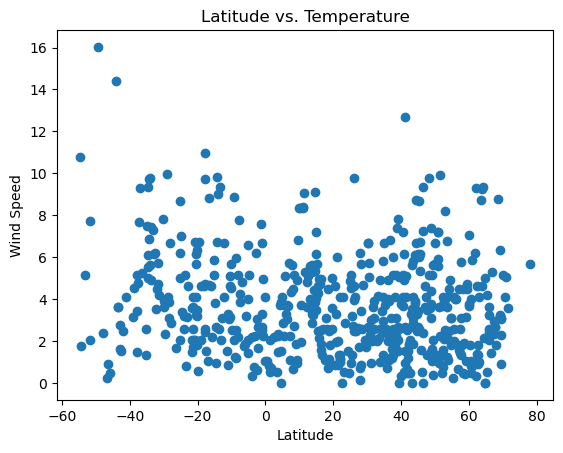

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat>=0')

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,-17.59,100,100,2.15,RU,1698760752
2,nemuro,43.3236,145.5750,11.74,89,43,5.61,JP,1698760752
3,hawaiian paradise park,19.5933,-154.9731,23.35,97,100,2.57,US,1698760752
4,al khawr,25.7667,51.3167,25.94,51,87,2.70,QA,1698760752
6,thompson,55.7435,-97.8558,-8.91,79,75,4.12,CA,1698760485


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat<0')

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kirakira,-10.4544,161.9205,26.08,87,66,3.14,SB,1698760752
5,papatowai,-46.5619,169.4708,10.60,76,94,0.25,NZ,1698760753
7,port-aux-francais,-49.3500,70.2167,4.27,87,100,16.03,TF,1698760753
8,arquitecto tomas romero pereira,-26.4833,-55.2500,23.05,76,100,1.67,PY,1698760753
9,ushuaia,-54.8000,-68.3000,7.79,58,40,10.80,AR,1698760753


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.83


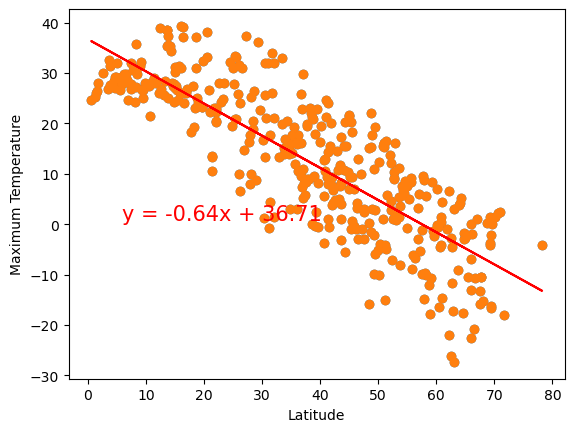

In [27]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

The r-squared is: 0.81


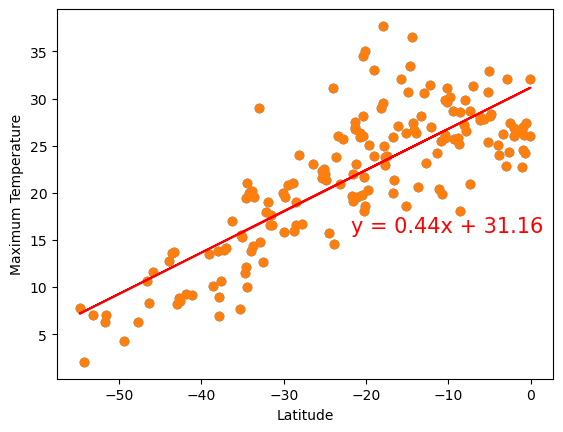

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-21.8,15.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a r-value of -0.83, and the Southern Hemisphere has a r-value of 0.81. The r-value basically dictates the correlation between the temperatures and distance in regards to Latitude. In this case, there is a strong correlation emphasizing that the further away you are from the Equator (or Latitude of 0) the lower the temperature will be. As you get closer the equator or Latitude of 0, the higher the temperatures get.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.32


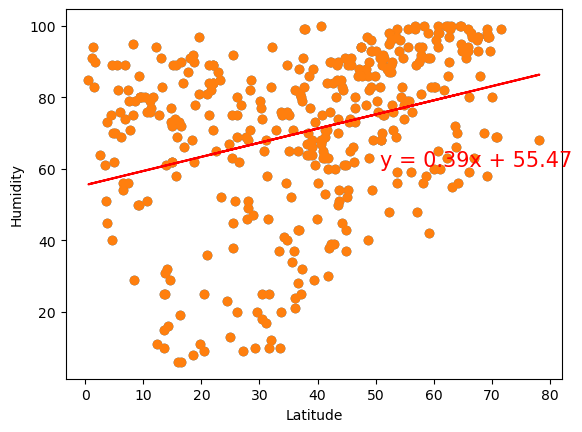

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50.8,60.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

The r-squared is: 0.05


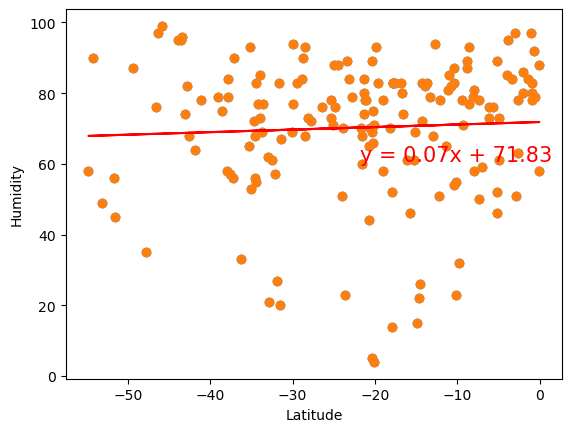

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-21.8,60.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a r-value of 0.32, and the Southern Hemisphere has a r-value of 0.05. The farther away from the equator, the less humid it will be. Both graphs have a positive correlation, meaning that as the latitude increases, so does the humidity. However, with the r-values being so low, the correlation is weak. This means that just because there is a trend of being farther away from the equator, may not necessarily result in less Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1


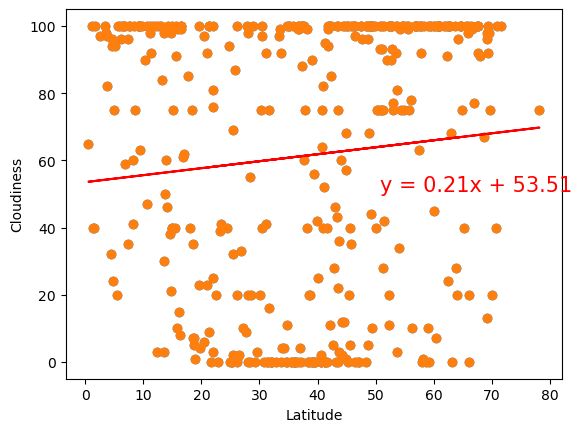

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50.8,50.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

The r-squared is: 0.08


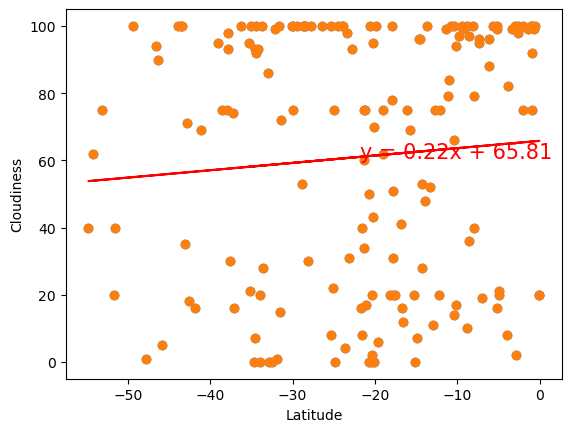

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-21.8,60.8),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a r-value of 0.1, and the Southern Hemisphere has a r-value of 0.08. This is basically stating that both graphs while small, have a positive correlation. Meaning, the closer to the equator you get, the more cloudy it will be. However, also with an r value as small as these, we can conclude that there is weak or no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.01


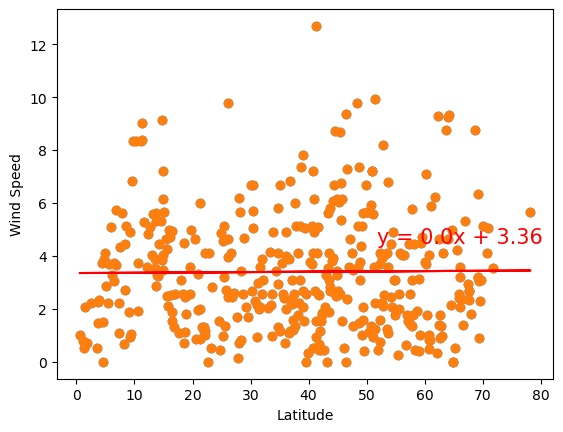

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(51.8,4.5),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

The r-squared is: -0.21


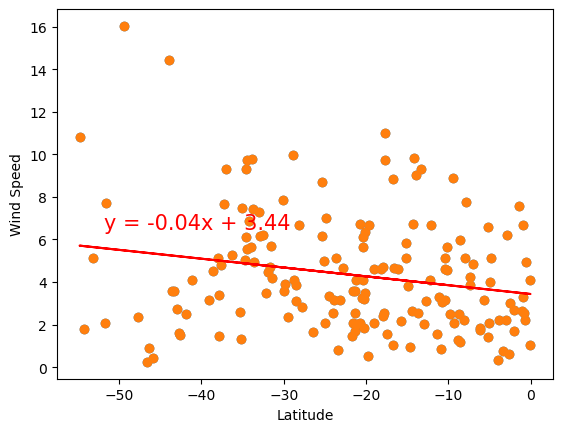

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Line Equation grabbed from in class assignments
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-51.8,6.5),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue,2)}")
plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a r-value of 0.01, and the Southern Hemisphere has a r-value of -0.21. The Northern Hemisphere has an r-value so small, that we can conclude that there is little to no correlation between Latitude and Wind Speed in the northern Hemisphere. Although, in the Southern Hemisphere, while the r-value is low, it is not as low, meaning there is just a week correlation. The Southern Hemisphere also has a negative correlation, meaning the closer you get to the equator, more than likely, one will experience low winds.